In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
class KMeansCustom:
    def __init__(self, n_clusters, max_iterations=100):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations

    def initialize_centroids(self, data):
        return data[np.random.choice(data.shape[0], self.n_clusters, replace=False)]

    def assign_to_clusters(self, data, centroids):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        return np.argmin(distances, axis=1)

    def update_centroids(self, data, clusters):
        return np.array([data[clusters == i].mean(axis=0) for i in range(self.n_clusters)])

    def fit(self, data):
        centroids = self.initialize_centroids(data)

        for _ in range(self.max_iterations):
            clusters = self.assign_to_clusters(data, centroids)
            new_centroids = self.update_centroids(data, clusters)

            if np.array_equal(centroids, new_centroids):
                break

            centroids = new_centroids

        self.centroids_ = centroids
        self.labels_ = clusters

In [4]:
iris = load_iris()
data = iris.data[:, 2:4]

In [5]:
k = 3
kmeans_custom = KMeansCustom(n_clusters=k)
kmeans_custom.fit(data)

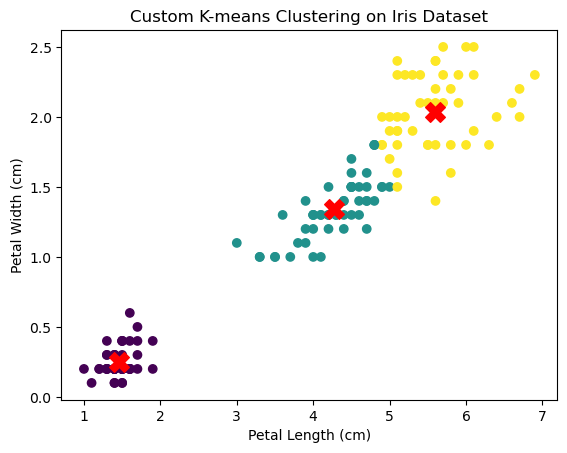

In [6]:
plt.scatter(data[:, 0], data[:, 1], c=kmeans_custom.labels_, cmap='viridis')
plt.scatter(kmeans_custom.centroids_[:, 0], kmeans_custom.centroids_[:, 1], marker='X', s=200, c='red')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Custom K-means Clustering on Iris Dataset')
plt.show()